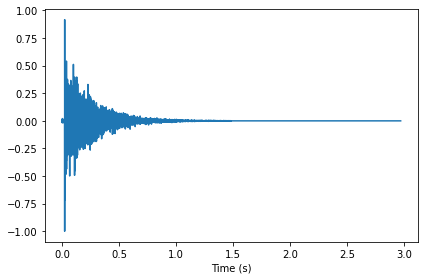

In [5]:
# --------- УПРАЖНЕНИЕ 1 ---------

import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

from thinkdsp import read_wave

response = read_wave('res/180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

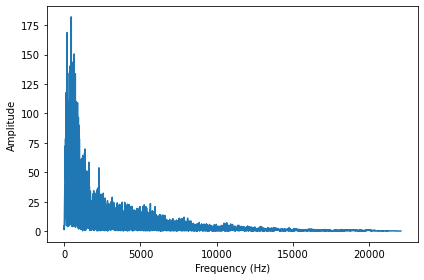

In [6]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

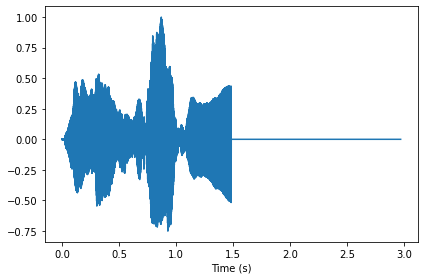

In [8]:
violin = read_wave('res/92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

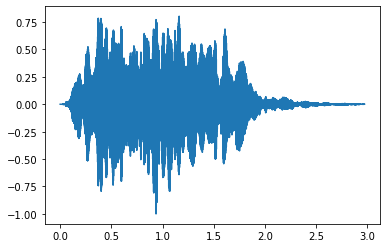

In [9]:
spectrum = violin.make_spectrum()

output = (spectrum * transfer).make_wave()
output.normalize()

output.plot()

In [10]:
output.make_audio()

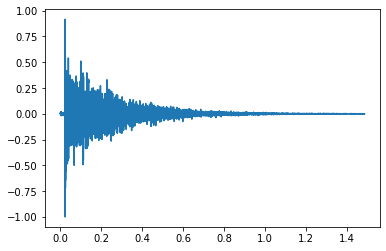

In [11]:
response.truncate(2**16)
response.plot()

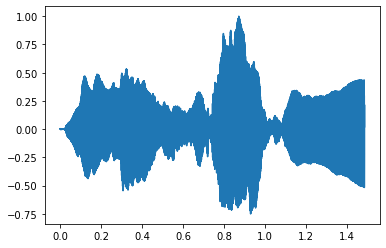

In [12]:
violin.truncate(2**16)
violin.plot()

(131072, 131071)

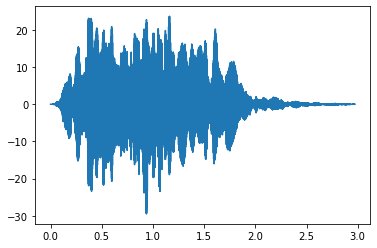

In [16]:
output2 = violin.convolve(response)
output2.plot()
len(output), len(output2)

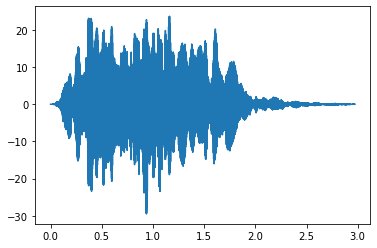

In [17]:
from thinkdsp import Wave

import scipy.signal
ys = scipy.signal.fftconvolve(violin.ys, response.ys)
output3 = Wave(ys, framerate=violin.framerate)
output3.plot()

In [18]:
output2.max_diff(output3)

1.4210854715202004e-14

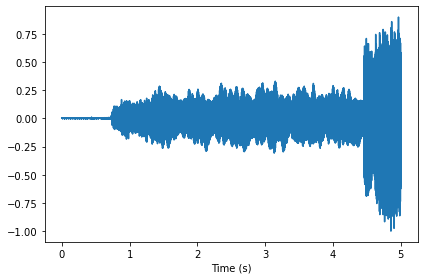

In [19]:
# --------- УПРАЖНЕНИЕ 2 ---------

response = read_wave('res/bagpipe_music.wav')

start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

In [20]:
response.make_audio()

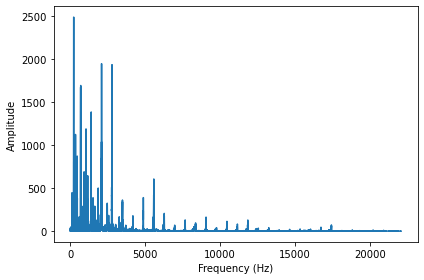

In [21]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

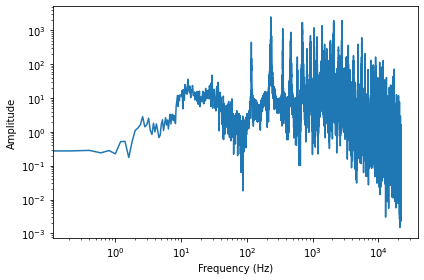

In [22]:
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude',
         xscale='log', yscale='log')

In [28]:
def serial_corr(wave, lag=1):
    N = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr

def autocorr(wave):
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

def estimate_fundamental(segment, low=70, high=150):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

wave = read_wave('res/flute_music.wav')
segment = wave.segment(start = 0.2, duration = 0.01)
frequency = estimate_fundamental(segment)
frequency

630.0

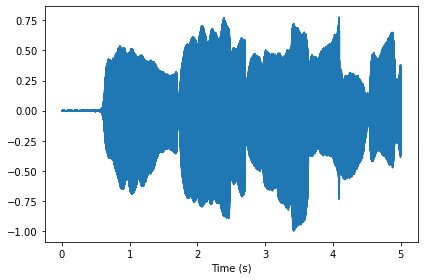

In [29]:
wave = read_wave('res/flute_music.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

In [30]:
wave.make_audio()

In [31]:
spectrum = wave.make_spectrum()
len(spectrum.hs), len(transfer.hs)

In [36]:
len(spectrum.hs), len(transfer.hs)

(110251, 110251)

In [37]:
spectrum.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

In [38]:
transfer.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

In [39]:
output = (spectrum * transfer).make_wave()
output.normalize()

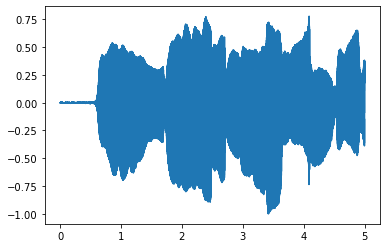

In [40]:
wave.plot()

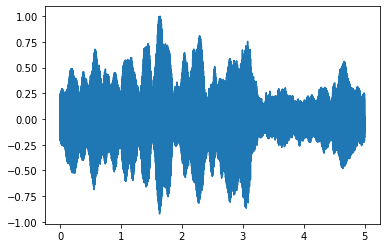

In [41]:
output.plot()

In [42]:
output.make_audio()

In [43]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()